In [12]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("C:\\Users\\rudak\\Downloads\\datapython1.csv", sep=';')
print(df)

           id                             region9_name  migration29 gender  \
0     3010101      Республика Северная Осетия (Алания)          0.0    жен   
1     3010103                                      NaN          NaN    жен   
2     3010104      Республика Северная Осетия (Алания)          0.0    жен   
3     3010105      Республика Северная Осетия (Алания)          1.0    жен   
4     3010106      Республика Северная Осетия (Алания)          0.0    жен   
...       ...                                      ...          ...    ...   
4133  5100120                     Новгородская область          0.0    жен   
4134  5100121  Санкт-Петербург и Ленинградская область          1.0    муж   
4135  5100122                     Новгородская область          0.0    жен   
4136  5100124                     Новгородская область          0.0    муж   
4137  5100125                     Новгородская область          0.0    жен   

      work_schedule  income_job  
0               2.0     20000

In [15]:
# Посмотрим на первые 10 строк.
df.head(10)

,id,region9_name,migration29,gender,work_schedule,income_job
0,3010101,Республика Северная Осетия (Алания),0.0,жен,2.0,20000.0
1,3010103,NaN,NaN,жен,NaN,NaN
2,3010104,Республика Северная Осетия (Алания),0.0,жен,1.0,15000.0
3,3010105,Республика Северная Осетия (Алания),1.0,жен,1.0,12000.0
4,3010106,Республика Северная Осетия (Алания),0.0,жен,0.0,0.0
5,3010107,Краснодарский край,1.0,муж,1.0,15000.0
6,3010108,Республика Северная Осетия (Алания),0.0,жен,0.0,0.0
7,3010109,Республика Северная Осетия (Алания),1.0,жен,0.0,0.0
8,3010111,Республика Северная Осетия (Алания),0.0,муж,3.0,0.0
9,3010112,Республика Северная Осетия (Алания),0.0,жен,0.0,0.0


In [16]:
df.dtypes

id                 int64
region9_name      object
migration29      float64
gender            object
work_schedule    float64
income_job       float64
dtype: object

In [17]:
# Для переменной work_schedule оставим только значение "1" - "работаю полный рабочий день".

# Сам вопрос в анкете выглядит так:

# Вы сейчас работаете (включая оплачиваемую подработку) или не работаете? (Отметьте один ответ.)
# 1. работаю полный рабочий день
# 2. работаю неполный рабочий день / неполную рабочую неделю
# 3. работаю нерегулярно, от случая к случаю
# 4. работаю, но сейчас нахожусь в отпуске
# 5. работаю, но сейчас нахожусь в декретном отпуске или по уходу за ребёнком
# 6. не работаю --------------- переход к в.№36
# 7. затрудняюсь ответить

In [18]:
df = df[df['work_schedule'] == 1]

In [19]:
# Подсчет количества пропущенных значений в переменной region9_name
nan_count_region = df['region9_name'].isna().sum()

print("Количество пропущенных значений в переменной region9_name:", nan_count_region)

Количество пропущенных значений в переменной region9_name: 0


In [20]:
print(df.columns)

Index(['id', 'region9_name', 'migration29', 'gender', 'work_schedule',
       'income_job'],
      dtype='object')


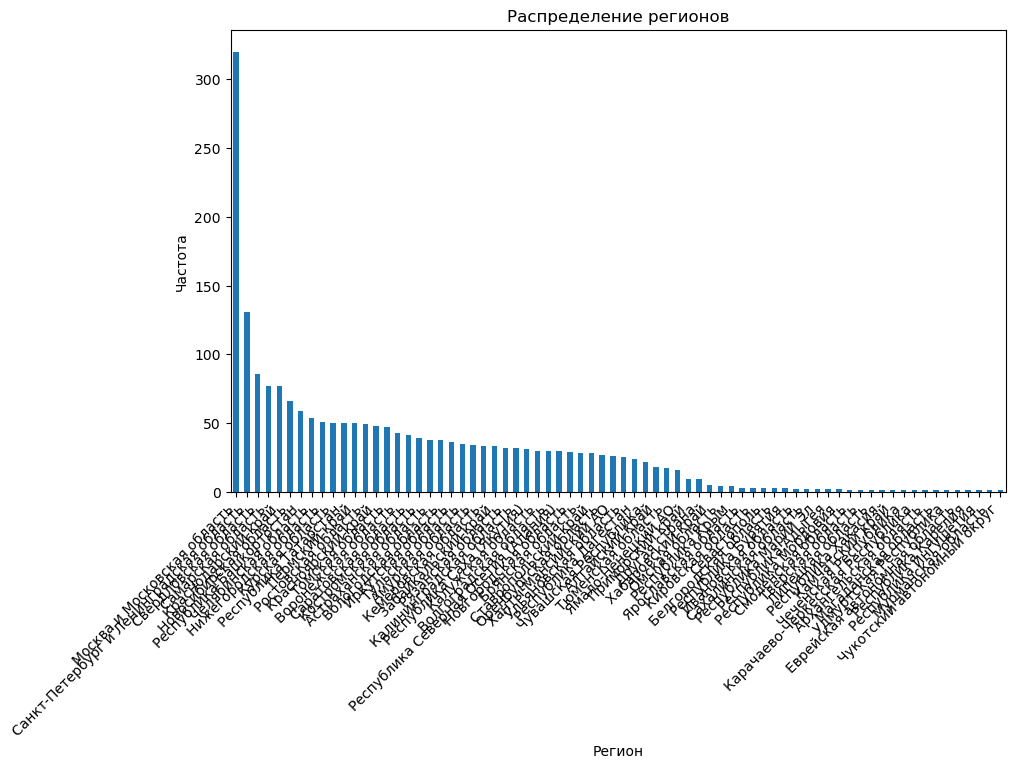

In [23]:
# Будем делать EDA для каждой переменной. Для переменной регион построим гистограмму, чтобы оценить,
# сколько людей проживает в том или ином регионе.

# Убедимся, что данные в столбце region9_name не содержат пропущенных значений
df.dropna(subset=['region9_name'], inplace=True)

import matplotlib.pyplot as plt

# Построение гистограммы распределения регионов
plt.figure(figsize=(10, 6))
df['region9_name'].value_counts().plot(kind='bar')
plt.title('Распределение регионов')
plt.xlabel('Регион')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.show()

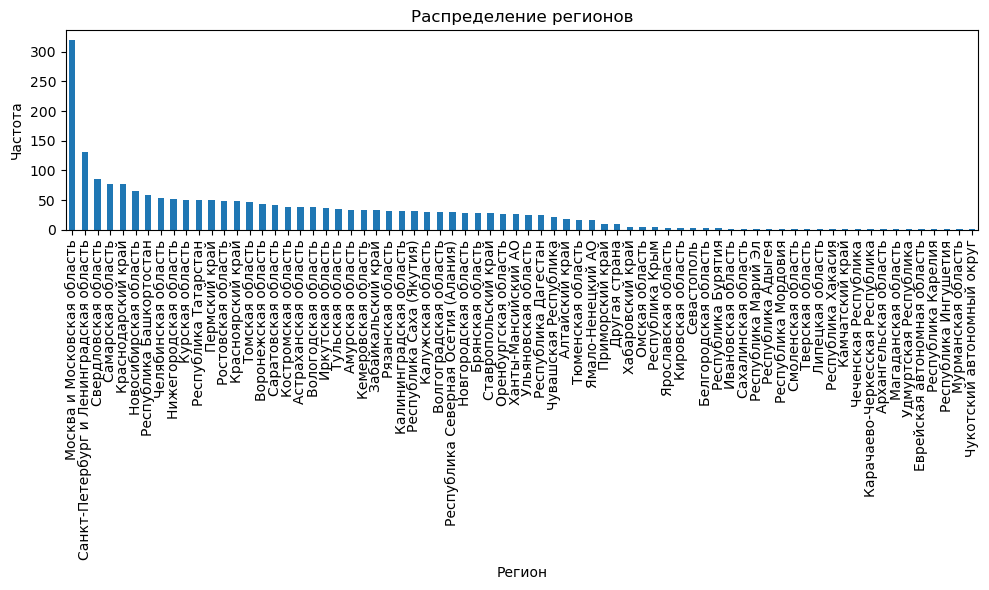

In [24]:
# Построение гистограммы распределения регионов с поворотом подписей на оси x
plt.figure(figsize=(10, 6))
df['region9_name'].value_counts().plot(kind='bar')
plt.title('Распределение регионов')
plt.xlabel('Регион')
plt.ylabel('Частота')
plt.xticks(rotation=90)  # Поворот подписей на оси x на 90 градусов
plt.tight_layout()  # Автоматическое улучшение расположения элементов графика
plt.show()

In [26]:
# Подсчет доли людей для всех регионов - посмотрим на относительные числа
region_proportions = df['region9_name'].value_counts(normalize=True)

print(region_proportions)

region9_name
Москва и Московская область                0.152308
Санкт-Петербург и Ленинградская область    0.062351
Свердловская область                       0.040933
Самарская область                          0.036649
Краснодарский край                         0.036649
                                             ...   
Еврейская автономная область               0.000476
Республика Карелия                         0.000476
Республика Ингушетия                       0.000476
Мурманская область                         0.000476
Чукотский автономный округ                 0.000476
Name: proportion, Length: 72, dtype: float64


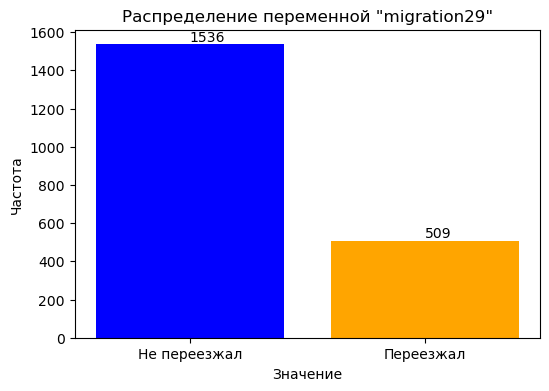

In [27]:
# Подсчет количества наблюдений для каждого значения переменной migration29
# Эта переменная расчетная и показывает, сменил ли респондент регион в возрасте от 15 лет (1 волна исследования) до 23 лет
# (9 волна исследования)
migration_counts = df['migration29'].value_counts()

# Визуализация распределения переменной migration29 с аннотациями
plt.figure(figsize=(6, 4))
bars = plt.bar(migration_counts.index.astype(str), migration_counts.values, color=['blue', 'orange'])
plt.title('Распределение переменной "migration29"')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Добавление аннотаций с количеством наблюдений над каждым столбцом
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

# Добавление подписей к оси x
plt.xticks([0, 1], ['Не переезжал', 'Переезжал'])

plt.show()

In [28]:
# Подсчет доли людей, которые переезжали или не переезжали - посмотрим на относительные числа
region_proportions = df['migration29'].value_counts(normalize=True)

print(region_proportions)

# Видим, что 75% людей НЕ переезжали, 25% людей переезжали.

migration29
0.0    0.7511
1.0    0.2489
Name: proportion, dtype: float64


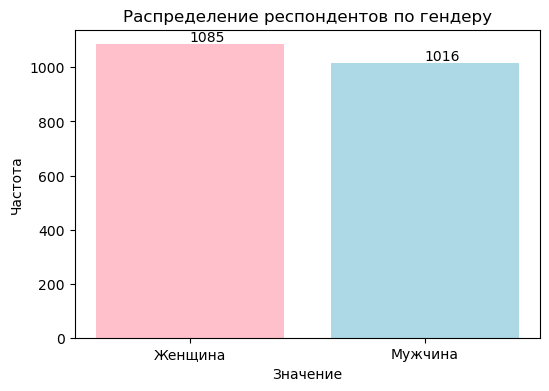

In [29]:
# Подсчет количества наблюдений для каждого значения переменной гендер
gender_counts = df['gender'].value_counts()

# Визуализация распределения переменной gender с аннотациями
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_counts.index.astype(str), gender_counts.values, color=['pink', 'lightblue',])
plt.title('Распределение респондентов по гендеру')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Добавление аннотаций с количеством наблюдений над каждым столбцом
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

# Добавление подписей к оси x
plt.xticks([0, 1], ['Женщина', 'Мужчина'])

plt.show()

income_job
NaN         280
30000.0     227
25000.0     166
40000.0     154
50000.0     142
           ... 
175000.0      1
20010.0       1
170000.0      1
21700.0       1
17500.0       1
Name: count, Length: 127, dtype: int64
Описательные статистики для переменной 'income_job':
count       1821.000000
mean       40864.939594
std        38491.167621
min        12500.000000
25%        25000.000000
50%        34000.000000
75%        50000.000000
max      1000000.000000
Name: income_job, dtype: float64



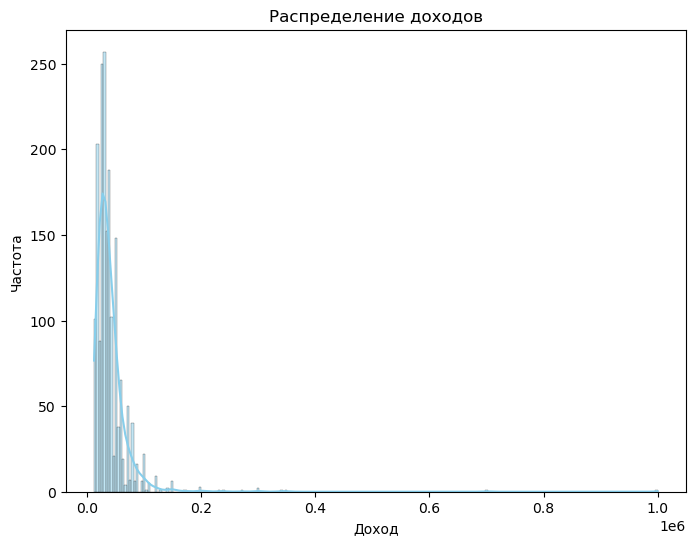

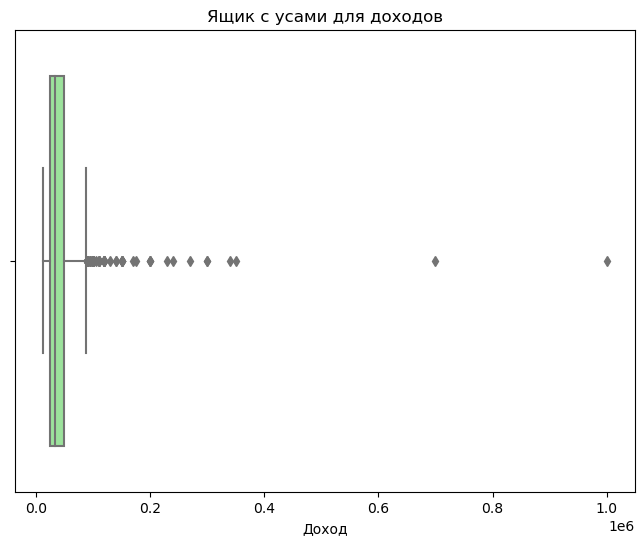

In [30]:
# Сделаем EDA для переменной "доход".
# Сначала исключим значения -445 - это значение NA в исходных данных.
# Затем уберем 0, т.к. респондент не может получать 0 рублей дохода, работая полный рабочий день.
# Также отберем значения выше 12129 руб. - то есть, выше минимального прожиточного минимума в год проведения 9-ой волны исследования.
# Мы исключаем эту цифру, т.к. в данных присутствовали значения 1000, 2000 и пр. слишком маленькие величины доходов.

import numpy as np

# Замена значений -445 на NaN
df['income_job'].replace(-445, np.nan, inplace=True)

# Замена значений 0 на NaN
df['income_job'].replace(0, np.nan, inplace=True)

# Заменим все значения меньше 12129 рублей на Na: это минимальный прожиточный минимум в год проведения исследования

df['income_job'] = df['income_job'].mask(df['income_job'] < 12129, np.nan)

# Проверка результатов замены
print(df['income_job'].value_counts(dropna=False))

import seaborn as sns

# 1. Описательные статистики
print("Описательные статистики для переменной 'income_job':")
print(df['income_job'].describe())
print()

# 2. Гистограмма распределения доходов
plt.figure(figsize=(8, 6))
sns.histplot(df['income_job'], kde=True, color='skyblue')
plt.title('Распределение доходов')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

# 3. Ящик с усами для доходов
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['income_job'], color='lightgreen')
plt.title('Ящик с усами для доходов')
plt.xlabel('Доход')
plt.show()

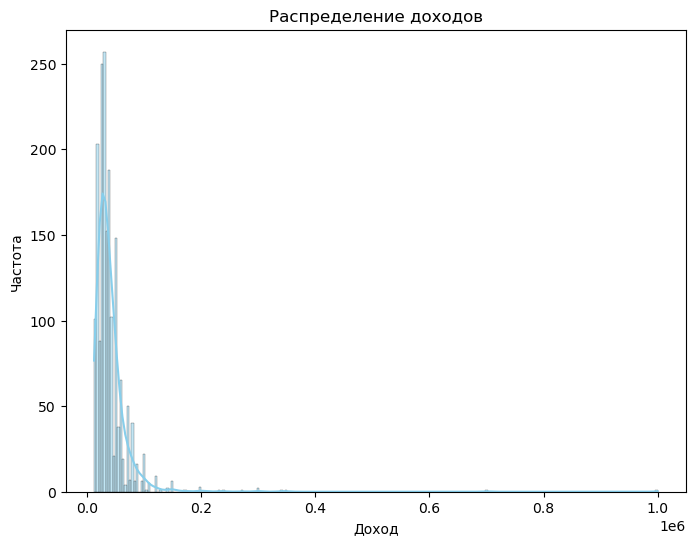

count       1821.000000
mean       40864.939594
std        38491.167621
min        12500.000000
25%        25000.000000
50%        34000.000000
75%        50000.000000
max      1000000.000000
Name: income_job, dtype: float64


In [31]:
# Описательные статистики
statistics = df['income_job'].describe()

# Гистограмма
plt.figure(figsize=(8, 6))
sns.histplot(df['income_job'], kde=True, color='skyblue')
plt.title('Распределение доходов')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

print(statistics)

# График доходов имеет длинный хвост справа, т.к. в данных присутствуют аномально выссокие доходы. Пока мы их не исключаем.

In [32]:
# Посмотрим на выбросы в переменной доход. 

# Вычисляем межквартильный диапазон
Q1 = df['income_job'].quantile(0.25)
Q3 = df['income_job'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы "усов" для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Отображаем значения, находящиеся за пределами "усов"
outliers = df[(df['income_job'] < lower_bound) | (df['income_job'] > upper_bound)]['income_job']
print(outliers)

70      100000.0
628     150000.0
637     100000.0
642     340000.0
652     110000.0
          ...   
3931    105000.0
3939    120000.0
3979    120000.0
4025    100000.0
4125    100000.0
Name: income_job, Length: 79, dtype: float64


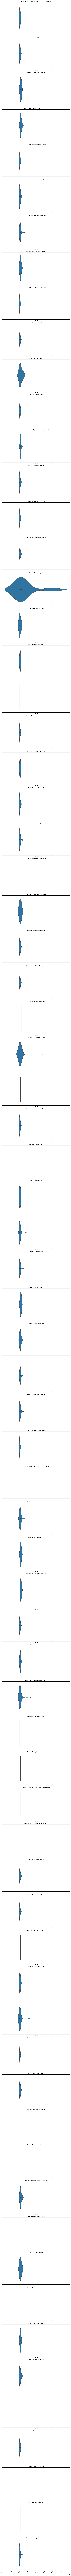

In [33]:
# Пока не ясно, как сделать верхнюю отсечку по переменной доход. Мы не можем исключить тех 23-летних, кто получает 100 тыс. руб.,
# т.к. такой доход вполне возможен в Москве, например.

# Посмотрим, как распределен доход по регионам.

import seaborn as sns
import matplotlib.pyplot as plt

# Получаем список уникальных регионов
regions = df['region9_name'].unique()

# Создаем отдельные скрипичные графики для каждого региона
fig, axes = plt.subplots(len(regions), 1, figsize=(10, len(regions)*5), sharex=True)
for i, region in enumerate(regions):
    sns.violinplot(ax=axes[i], x='income_job', data=df[df['region9_name'] == region])
    axes[i].set_title(f'Регион: {region}')
    axes[i].set_xlabel('Доход')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [40]:
# Для оценки метрик, оставим только переменные гендер, миграция и доход. С переменной регион все очень сложно, постоянно
# были какие-то ошибки, с которыми мне как новичку пока сложно разобраться.
# Хотя эта переменная важна, пока для простоты мы будем ее игнорировать, хотя как исследователь я понимаю,
# насколько доход зависит от региона проживания.

# Проверка наличия пропущенных значений в переменной 'income_job'
missing_values = df['income_job'].isnull().sum()
print("Количество пропущенных значений в переменной 'income_job':", missing_values)

# Проверка наличия пропущенных значений во всем датафрейме
missing_values_all = df.isnull().sum()
print("Количество пропущенных значений в каждой переменной:")
print(missing_values_all)

# Удалим 56 значений-пропусков по переменной миграции

# Удаление строк с пропущенными значениями переменной 'migration29'
df = df.dropna(subset=['migration29'])

# Удаление строк с пропущенными значениями переменной доход
df = df.dropna(subset=['income_job'])

# Проверка количества строк после удаления
missing_values_all = df.isnull().sum()
print("Количество пропущенных значений в каждой переменной:")
print(missing_values_all)

Количество пропущенных значений в переменной 'income_job': 272
Количество пропущенных значений в каждой переменной:
id                  0
region9_name        0
migration29         0
gender              0
work_schedule       0
income_job        272
gender_encoded      0
dtype: int64
Количество пропущенных значений в каждой переменной:
id                0
region9_name      0
migration29       0
gender            0
work_schedule     0
income_job        0
gender_encoded    0
dtype: int64


In [35]:
# Определение соответствия категориальных значений числовым
gender_mapping = {'муж': 0, 'жен': 1}

# Преобразование категориальных значений в числовые с помощью map
df['gender_encoded'] = df['gender'].map(gender_mapping)

# Проверка результата
print(df[['gender', 'gender_encoded']].head())


   gender  gender_encoded
2     жен               1
3     жен               1
5     муж               0
12    муж               0
13    муж               0


In [36]:
# посмотрим, как закодирована переменная миграция

print(df['migration29'].unique())


[0. 1.]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Определяем независимые и зависимую переменные
X = df[['migration29', 'gender_encoded']]
y = df['income_job']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Рассчитываем MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3090961459.0845103


In [42]:
# MSE огромен, поэтому я прихожу к выводу, что данная модель пока очень плохо объясняет связь между данными.
# Рассмотрим далее еще одну метрику - коэффициент детерминации, чтобы посмотреть, какую долю дисперсии объсняет наша модель.

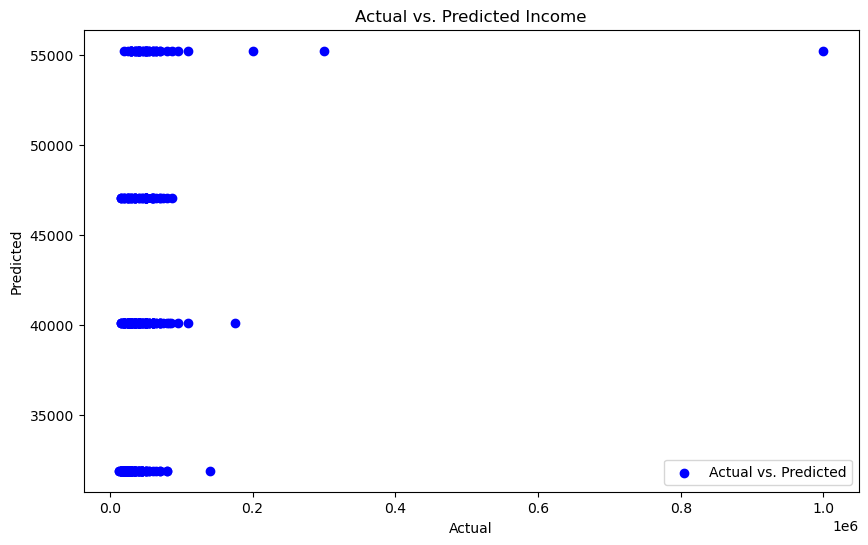

In [43]:
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(10, 6))

# Размещаем фактические значения и предсказанные значения на графике
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Добавляем подписи осей и заголовок
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Income')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()


In [44]:
print(df['income_job'].dtype)


float64


In [45]:
df['income_job'] = df['income_job'].astype('int64')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Определяем независимые и зависимую переменные
X = df[['migration29', 'gender_encoded']]
y = df['income_job']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Рассчитываем MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3090961459.0845103


In [47]:
r_squared = model.score(X_test, y_test)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Определяем независимые и зависимую переменные
X = df[['migration29', 'gender_encoded']]
y = df['income_job']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Рассчитываем коэффициент детерминации (R^2)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)


R-squared: 0.046109065391931714


In [ ]:
# В данном случае значение R-квадрата равно 0.008, что довольно низко.
# Это означает, что независимые переменные (миграция и пол) в нашей модели плохо объясняют вариацию
# в зависимой переменной (доход).

# Пока я прихожу к выводу, что данная регрессионная модель довольно плохая и нужно продолжать работать с данными,
# чтобы выявить более существенные зависимости.